# Data Informed Insights for Heart Disease Detection

**Author:** Elizabeth Martin Contreras <br>
**Course:** Machine Learning @ University of Colorado Boulder <br>
**Date:** Fall 2: Oct. 23 - Dec. 15, 2023 <br>
**Dataset:** [Heart Disease Dataset](https://www.kaggle.com/datasets/yasserh/heart-disease-dataset/data) (from Kaggle.com) <br>
**Github Repository:**


## Problem Description

From heart attacks, strokes, heart failure, arrhythmia, and many more, heart disease continues to be the leading cause of mortality rates around the world.  Experts agree that even with the latest developments in medical science, there is still an urgent need for not only improved but even earlier detection methods.  This is the foundation for my project, **Data Informed Insights for Heart Disease Detection.** Using analytical techniques from our coursework in data mining, machine learning, and statistics, I was able to find hidden patterns, correlations, and predictive factors within the dataset and broaden my understanding of data analysis & machine learning.

## Table of Contents

- [Required modules](#Required-Modules)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
- [Linear Regression](#Linear-Regression)
- [Logistic Regression](#Logistic-Regression)
- [Decision trees](#Decision-trees)
- [Key findings](#Key-Findings)
- [Discussion & Conclusion](#Discussion-&-Conclusion)

---
### Required Modules

In [68]:
# # Uncomment below as needed:
# # -----------------------------
# pip install pandas
# pip install seaborn
# pip install numpy
# pip install statsmodels
# pip install scikit-learn
# pip install altair
# pip install matplotlib

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier, export_text

import altair as alt
import matplotlib.pyplot as plt

---

### Exploratory Data Analysis

In [4]:
#columns = ['', '']
df = pd.read_csv("heart.csv") 
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Unexpected challenge - Understanding attribute names & meaning:

| Attribute |   | Meaning |
|:-----------| ----------- |:---------|
| age  |   | Age in years   |
| sex  |   | Female (0) or male (1) |
| cp |    | Chest pain type (typical angina (0), atypical angina (1), non-angina (2), or asymptomatic angina (3)) |
| trestbps |   | Resting blood pressure (mm Hg) |
| chol |    | Serum cholesterol (mg/dl) | 
| fbs |    | Fasting blood sugar < 120 mg/dl (0) or >120 mg/dl (1) |
| restecg |    | Resting electrocardiography results (normal (0), ST-T wave abnormality (1), or left ventricular hypertrophy(2)) |
| thalach |    | Maximum heart rate achieved during thalium stress test |
| exang |    | Exercise induced angina (yes (1) or no (0)) |
| oldpeak |    | ST depression induced by exercise relative to rest |
| slope |    | Slope of peak exercise ST segment (upsloping (1), flat (2), or downsloping (3)) |
| ca |   | Number of major vessels colored by fluoroscopy |
| thal |   | Thalium stress test result (normal (1), fixed defect (2), or reversible defect (3)) |
| target |    | Presence of heart disease |

---
Some questions came up as I was familiarizing myself with the dataset such as: "What part of the population is most at risk of being diagnosed with heart disease?"

In [5]:
female=df[df['sex']==0]
male=df[df['sex']==1]

female_chart = alt.Chart(female).mark_bar(color='salmon').encode(
    x=alt.X('age', bin=alt.Bin(maxbins=10), title="Age groups"),
    y=alt.Y('count()', title="Count")
).properties(
    title="Female Age Distribution"
)
male_chart = alt.Chart(male).mark_bar(color="steelblue").encode(
    x=alt.X('age', bin=alt.Bin(maxbins=10), title="Age groups"),
    y=alt.Y('count()', title="Count")
).properties(
    title="Male Age Distribution"
)
alt.hconcat(female_chart, male_chart).resolve_scale(y='shared')

alt.HConcatChart(...)

Answer: According to the data, men in their 60s are most at risk for being diagnosed with heart disease.

Question 2: "What is the most common type of chest pain?"

In [6]:
bin_breaks = [0, 1, 2, 3, 4]
bin_labels = ["Typical angina", "Atypical angina", "Non-Angina", "Asymptomatic Angina"]

cp_types = df.copy()
cp_types['cp_types'] = pd.cut(cp_types['cp'], bins=bin_breaks, labels=bin_labels, include_lowest=True, right=False)
cp_types = cp_types['cp_types'].value_counts().reset_index()
# cp_types

alt.Chart(cp_types).mark_bar(color="steelblue").encode(
    x=alt.X('count', title="Count"),
    y=alt.Y('cp_types', bin=False, title="CP type"),
    color=alt.Color('cp_types:N', title="Chest pain types")
).properties(
    title="Chest pain",
    width = 650,
    height = 200
)


alt.Chart(...)

Answer: The typical angina chest pain is the most common in patients admitted to the hospital for chest pains.

---

### Feature Selection

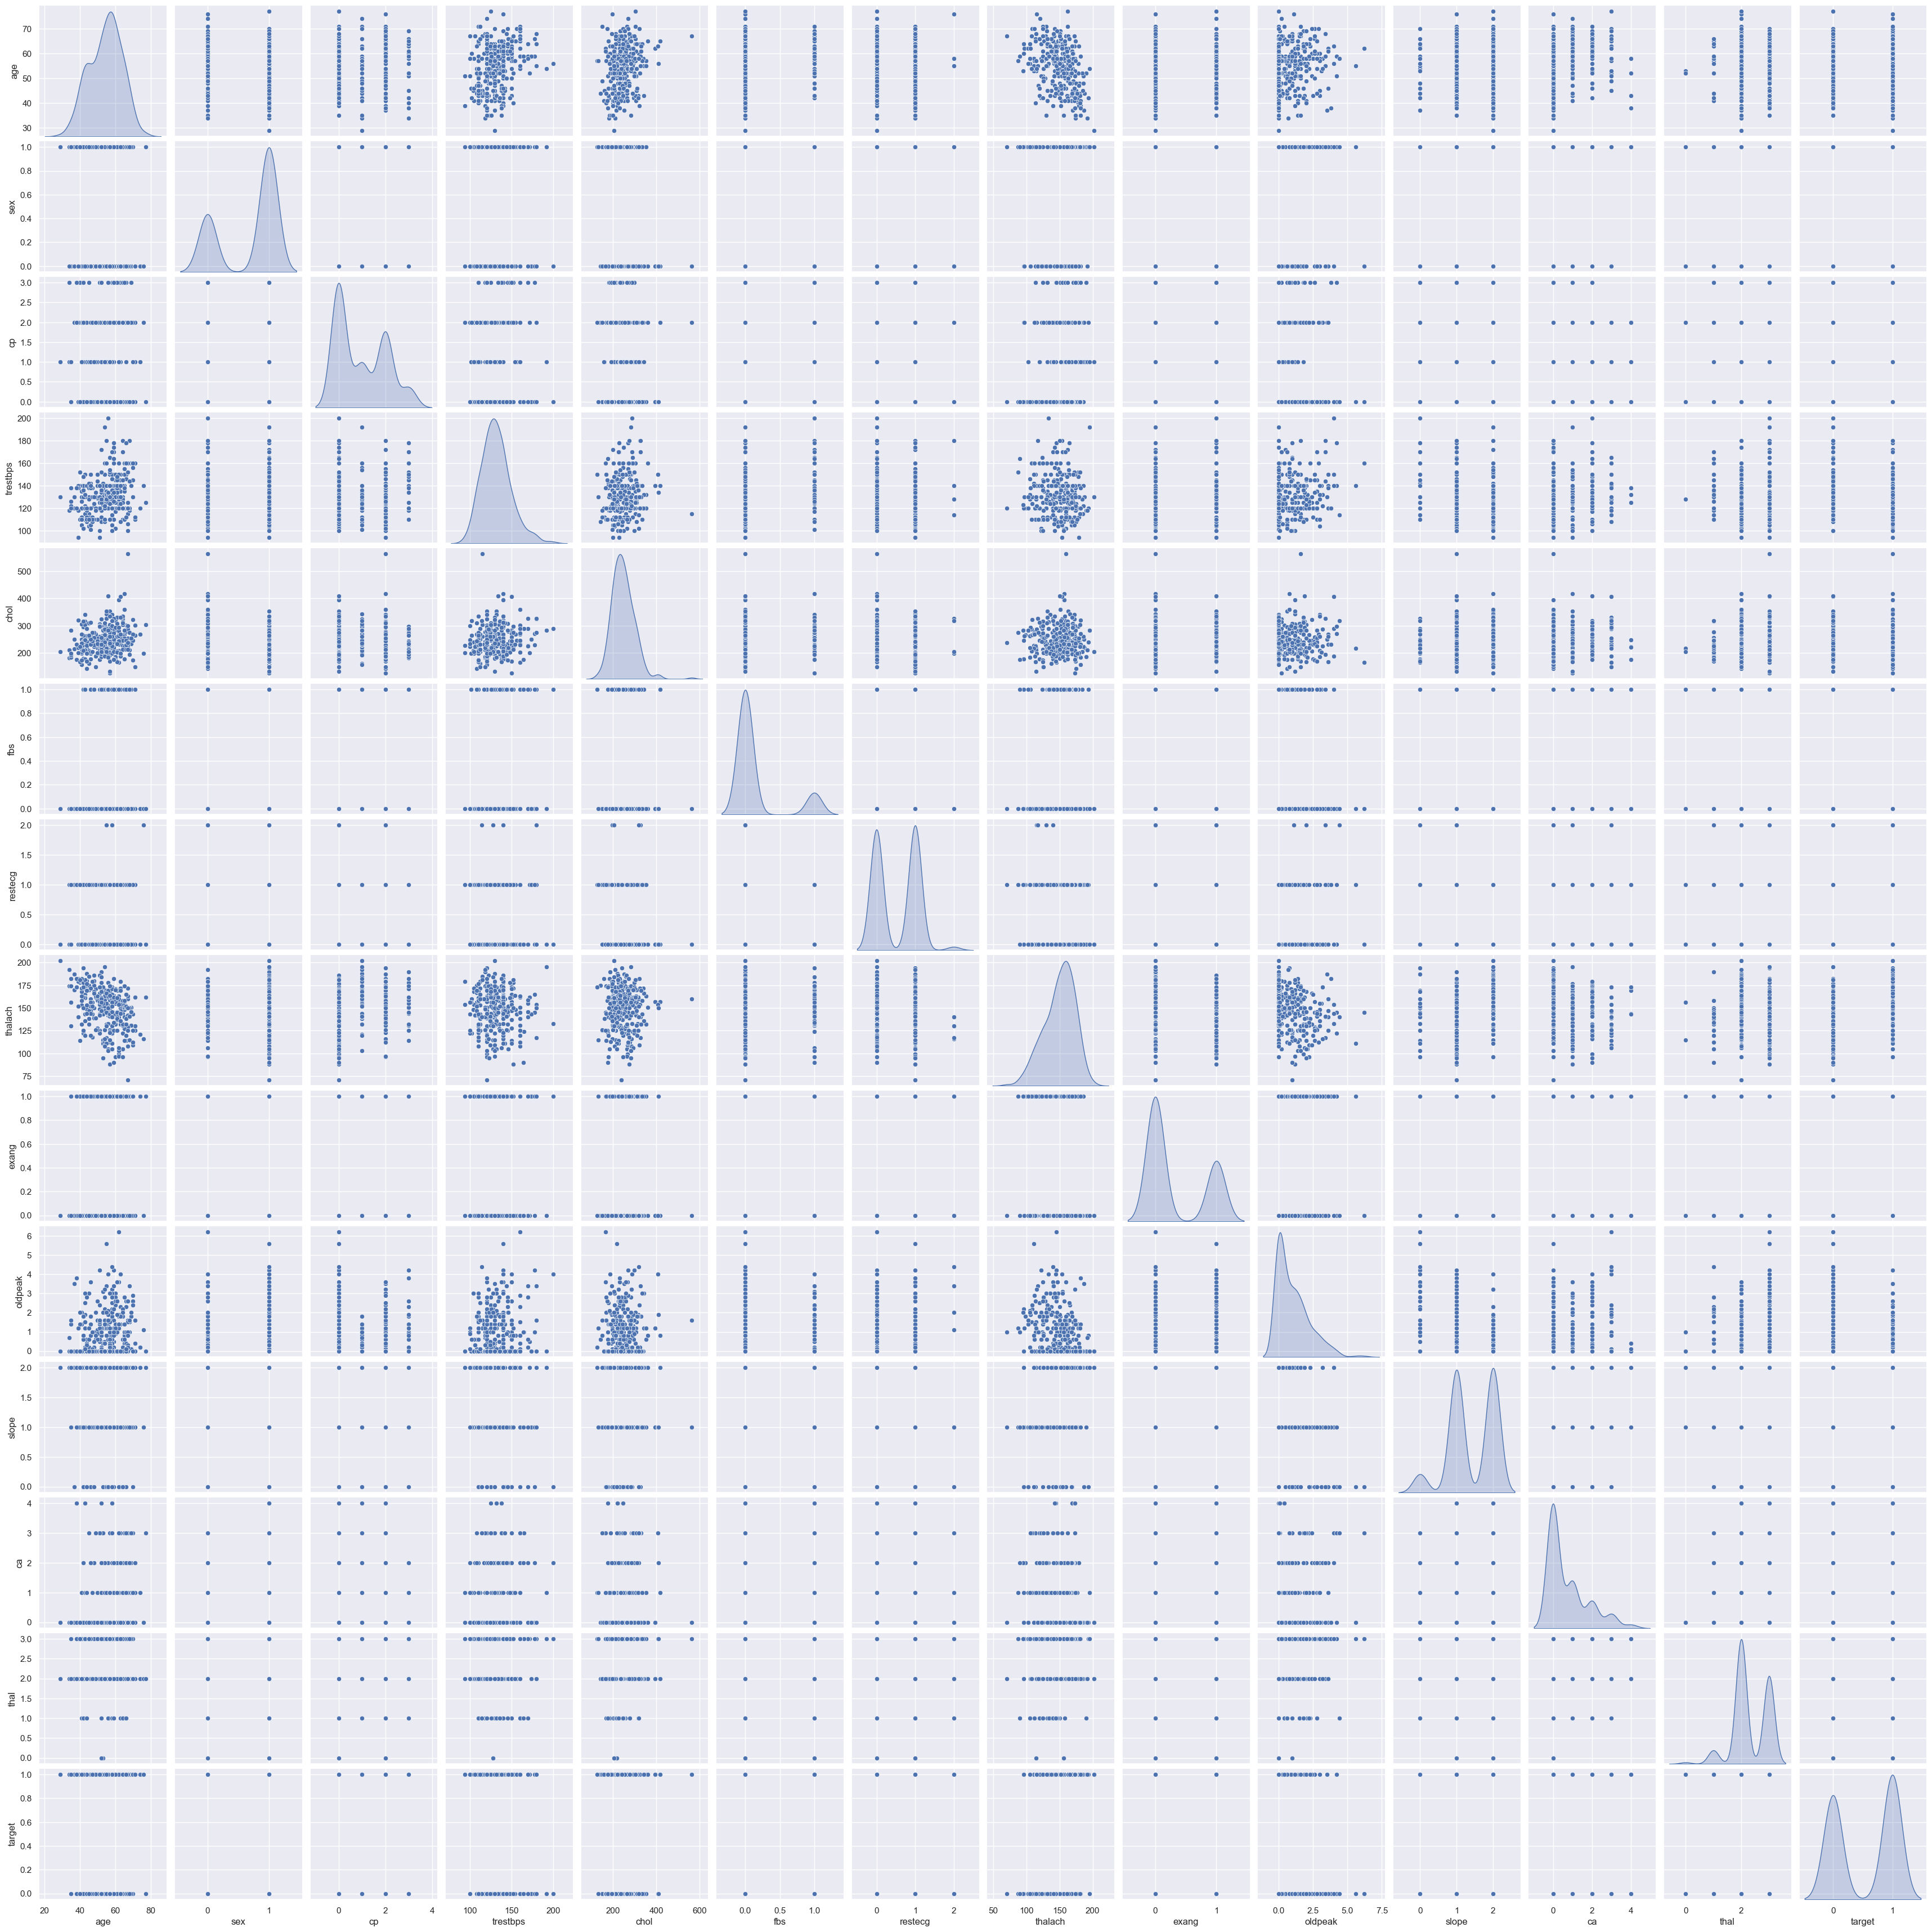

In [7]:
sns.set(font_scale=1)
sns.pairplot(data=df, diag_kind='kde')
plt.show()

<Axes: >

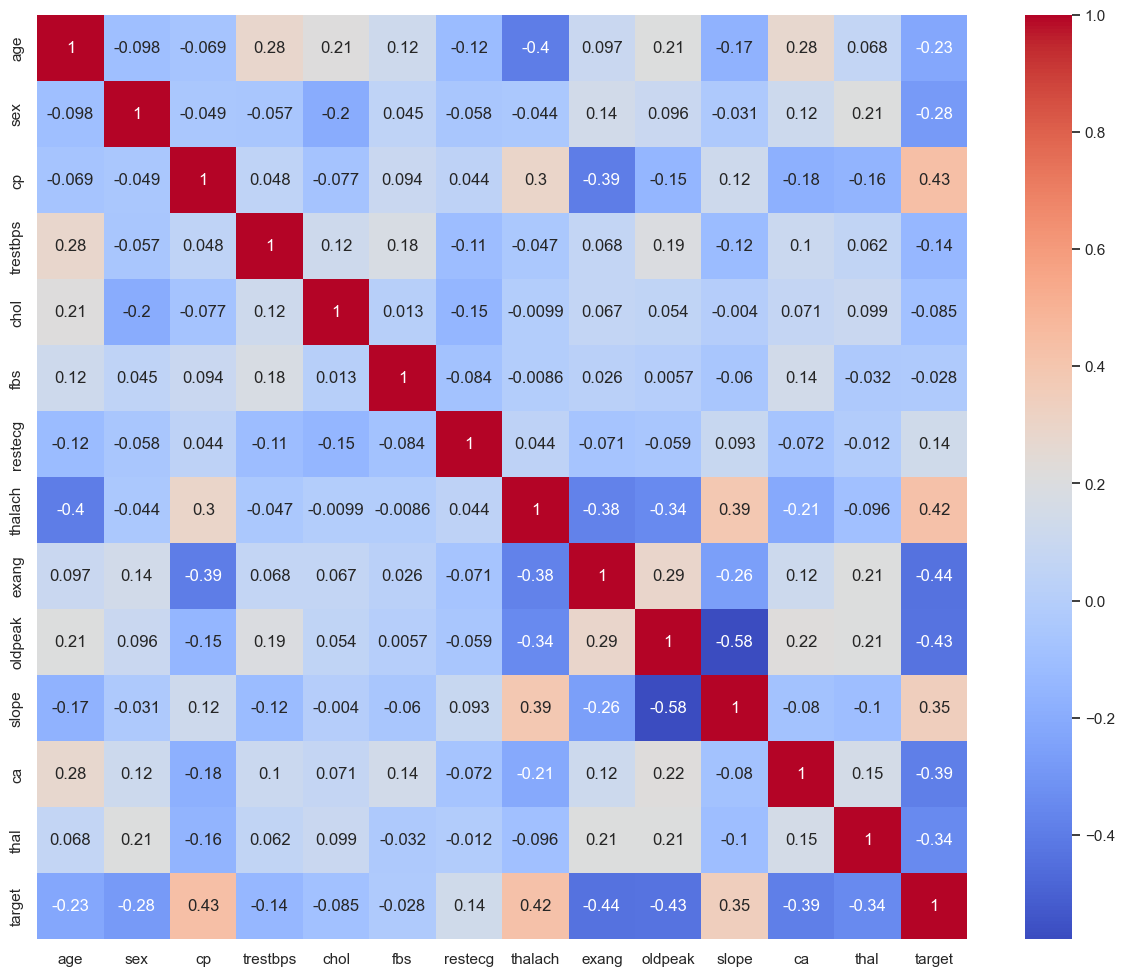

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

It's important to consider the absolute value of the correlation values.  Higher absolute values imply that the features have a stronger impact on the target variable. <br>
It seems like `cp`, `thalach`, `exang`, and `oldpeak` are the highest correlated features, we can start with these.

### Linear Regression

Some basic first attempts at linear regression, adding and taking out different features.

In [9]:
r_squared_vals = {}
for column in df.columns[:13]:
    formula = f"target ~ {column}"    
    model = smf.ols(formula = formula, data = df)
    results = model.fit()
    r_squared_vals[column] = results.rsquared

print("R squared values:")
print("---------------------------------")
for key, value in r_squared_vals.items():
    print(f"{key}:{value}")
    
print(f"\nMax R squared value is:{max(r_squared_vals.items(), key=lambda x:x[1])}")

R squared values:
---------------------------------
age:0.05082261461529536
sex:0.07892535945465995
cp:0.18818093168640393
trestbps:0.021005032007631708
chol:0.007265705044653736
fbs:0.0007865646692751804
restecg:0.018831936458982845
thalach:0.17786541525149957
exang:0.19075674985928426
oldpeak:0.18549904586948585
slope:0.11963095325303219
ca:0.15344768618360405
thal:0.11835613726697491

Max R squared value is:('exang', 0.19075674985928426)


While the `exang` feature has the highest R squared value, it's still pretty low.  We can try combining the different features, starting with the features that we noted down from the correlation matrix above.

In [10]:
formula = "target ~ cp + thalach + exang + oldpeak"
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     47.73
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           5.41e-31
Time:                        12:51:20   Log-Likelihood:                -143.70
No. Observations:                 303   AIC:                             297.4
Df Residuals:                     298   BIC:                             316.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0280      0.179      0.157      0.8

This R squared value is pretty small, lets also try with all the features and whittle some down from there.

In [11]:
formula = "target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal"
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.49e-38
Time:                        12:51:20   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8289      0.293      2.830      0.0

Let's try removing any features with a p-value over .05

In [12]:
formula = "target ~ sex + cp + thalach + exang + oldpeak + ca + thal"
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     42.17
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           5.58e-41
Time:                        12:51:20   Log-Likelihood:                -113.65
No. Observations:                 303   AIC:                             243.3
Df Residuals:                     295   BIC:                             273.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5365      0.180      2.977      0.0

We can also try a model with full interactions of the features above.

In [13]:
formula = "target ~ sex + sex:cp + sex:thalach + sex:exang + sex:oldpeak + sex:ca + sex:thal + cp +  cp:thalach + cp:exang + cp:oldpeak + cp:ca + cp:thal + thalach + thalach:exang + thalach:oldpeak + thalach:ca + thalach:thal + exang + exang:oldpeak + exang:ca + exang:thal + oldpeak + oldpeak:ca + oldpeak:thal + ca + ca:thal + thal"
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     12.42
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.79e-34
Time:                        12:51:20   Log-Likelihood:                -94.545
No. Observations:                 303   AIC:                             247.1
Df Residuals:                     274   BIC:                             354.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9962      0.654     

Again, remove any features with p-value over .05  

In [14]:
formula = "target ~ sex + cp:exang + cp:thal + thalach + exang + exang:thal + oldpeak:thal + ca + ca:thal + thal"
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     32.06
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.63e-41
Time:                        12:51:20   Log-Likelihood:                -106.46
No. Observations:                 303   AIC:                             234.9
Df Residuals:                     292   BIC:                             275.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9150      0.198      4.623   

Regardless of the changes I make, I can't bring my R-squared value over .559.  I have done some more research into the appropriate approach and found that linear regression might not be the best approach for this dataset.  When it comes to predicting a discrete variable, logistic regression is actually the better choice. <br>

Linear regression assumes that the dependent variable is continuous e.g., that it can take on any real value which doesn't align with the prediction of heart disease. Instead, logistic regression is designed for binary classification and models the probability of an event occurring which is more suitable to the prediction of heart disease.

### Logistic Regression

Trying logistic regression

In [15]:
copy_data = df.copy()
X = copy_data.drop('target', axis=1)
y = copy_data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.85
Confusion Matrix:
[[25  4]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



For a first attempt with no hyperparamter tuning or feature selection, a starting accuracy of .85 is pretty good! As this is a medical field, I want to try and optimize the model as much as possible.  <br>

**Definitions for reference:** <br>
- **Accuracy**: The ratio of correctly predicted instances to the total instances in the dataset
- **Confusion matrix layout:**
| Predicted Positive (P) | Predicted Negative (N) |
|------------------------|------------------------|
| True Positive (TP)   | False Negative (FN)   |
| False Positive (FP)  | True Negative (TN)    |

<br>

- **True Positive (TP):** The number of instances that were correctly predicted as positive.
- **False Negative (FN):** The number of instances that were actually positive but incorrectly predicted as negative.
- **False Positive (FP):** The number of instances that were actually negative but incorrectly predicted as positive.
- **True Negative (TN):** The number of instances that were correctly predicted as negative.
- **Precision**: Out of the instances that were predicted as positive, how many were actually positive
- **Recall**: Out of the actual positive instances, how many were correctly predicted
- **F1-score**: The harmonic mean of precision and recall
- **Support**:  The number of actual occurrences of the class in the specified dataset (e.g., the test set)



---

Some preliminary analysis before making changes to the model so I can compare afterwards

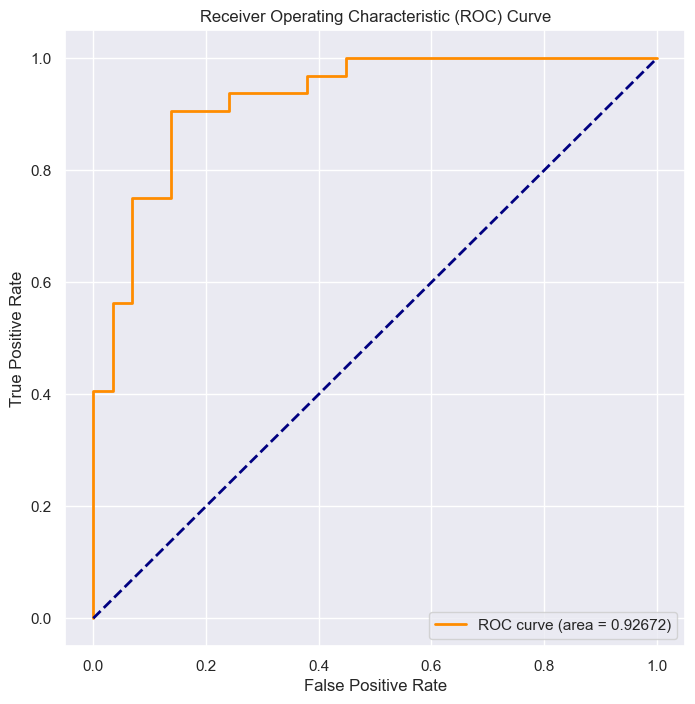

In [16]:
# Make predictions on the test set probabilities
y_pred_proba = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Definition: Recursive Feature Elimination (RFE)** is a feature selection technique that recursively removes the least important features until the specified number of features is reached.

In [17]:
# Create a logistic regression model
# logreg_model = LogisticRegression(random_state=42)

# Create the RFE model and select a number of features to retain
num_features_to_keep = 10 
rfe = RFE(estimator=logreg_model, n_features_to_select=num_features_to_keep)

# Fit the RFE model to your training data
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Train the logistic regression model on the selected features
logreg_model.fit(X_train_rfe, y_train)

# Transform the test set using the selected features
X_test_rfe = rfe.transform(X_test_scaled)

# Make predictions on the test set
y_pred_rfe = logreg_model.predict(X_test_rfe)

# Evaluate the model with the selected features
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)
classification_rep_rfe = classification_report(y_test, y_pred_rfe)

# Print the results
print(f'Accuracy with RFE: {accuracy_rfe:.2f}')
print(f'Confusion Matrix with RFE:\n{conf_matrix_rfe}')
print(f'Classification Report with RFE:\n{classification_rep_rfe}')
print(f'Selected Features: {selected_features}')


Accuracy with RFE: 0.89
Confusion Matrix with RFE:
[[25  4]
 [ 3 29]]
Classification Report with RFE:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Selected Features: Index(['sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')


Accuracy has improved from .85 to .89! <br> <br>
Re-compute ROC & AUC:

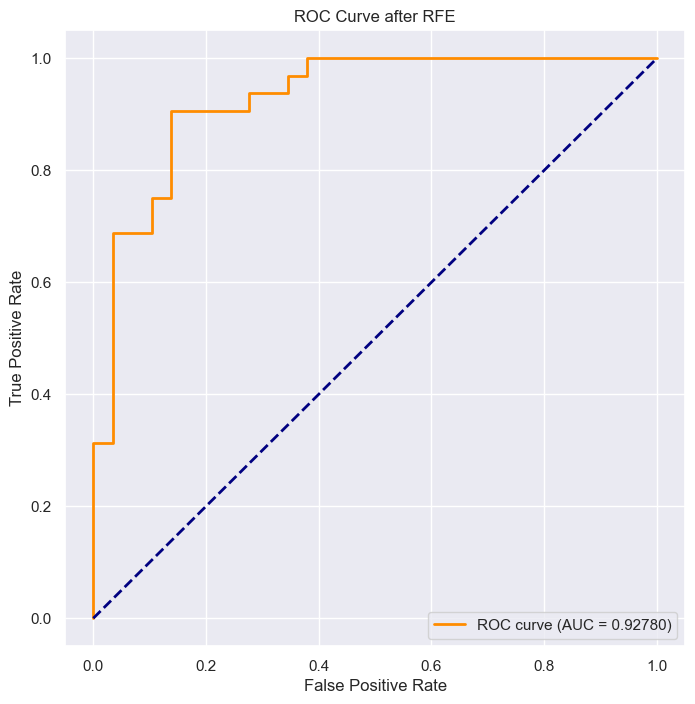

In [18]:
y_prob_rfe = logreg_model.predict_proba(X_test_rfe)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rfe)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after RFE')
plt.legend(loc='lower right')
plt.show()


You can see the slight improvement in the AUC since the false positive numbers dropped by 2 points (+ .00108)

### Trying GridSearch to fine tune C value

I did some further research to find other ways to improve my model and saw that modifying hyperparameters such as the C value in the Logistic Regression function:

Smaller C:

- Stronger regularization.
- Encourages the model to keep the coefficients close to zero.
- More regularization may lead to a simpler model, which can help prevent overfitting but might result in underfitting if set too high.

Larger C:

- Weaker regularization.
- Allows the model to fit the training data more closely, potentially capturing noise in the data.
- More flexible models, but with the risk of overfitting if the training data is noisy.


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Perform grid search
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter value
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

# Train the model with the best C value
best_model = LogisticRegression(C=best_C, random_state=42)
best_model.fit(X_train_scaled, y_train)


Best C: 1


LogisticRegression(C=1, random_state=42)

Nothing interesting to report from GridSearch, as it appears the best C value is the default.

---

### Decision trees

Using the features selected during the Recursive Feature Elimination process, I'll try creating a decision tree.

In [63]:
# These functions should look familiar ;)
def build_dt(data_X, data_y, max_depth = None, max_leaf_nodes =None):
    '''
    This function does the following:
    1. Builds the decision tree classifier using sklearn 
    2. Fits it to the provided data.
    
    
    Arguments
        data_X - a np.ndarray
        data_y - np.ndarray
        max_depth - None if unrestricted, otherwise an integer for the maximum
                depth the tree can reach.
    
    Returns:
        A trained DecisionTreeClassifier
    '''
    decision_tree = DecisionTreeClassifier(max_depth = max_depth, max_leaf_nodes = max_leaf_nodes)
    return decision_tree.fit(data_X, data_y)

def calculate_precision(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates precision for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # TP = True Positive = num times the prediction was positive & correct
    tp = np.sum((y_true == pos_label_value) & (y_pred == pos_label_value))
    # FP = False Positive = num times the prediction was positive & incorrect
    fp = np.sum((y_true != pos_label_value) & (y_pred == pos_label_value))
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    return precision

def calculate_recall(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates recall for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # TP = True Positive = num times the prediction was positive & correct
    tp = np.sum((y_true == pos_label_value) & (y_pred == pos_label_value))
    # FN = False Negative = num the prediction was negative & incorrect
    fn = np.sum((y_true == pos_label_value) & (y_pred != pos_label_value))
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    return recall

After trying up to max_depth = 15, 4 appears to be the best and achieves a similar accuracy to the logistic regression model above:

In [67]:
X_train_rfe_selected = X_train[selected_features]
X_test_rfe_selected = X_test[selected_features]

# Create and train the decision tree model
dt_model_rfe = build_dt(X_train_rfe_selected, y_train, max_depth = 4)
y_pred = dt_model_rfe.predict(X_test_rfe_selected)

print(f"Precision: {calculate_precision(y_test, y_pred)}")
print(f"Recall: {calculate_recall(y_test, y_pred)}")

# Export and print the decision tree rules
tree_rules_rfe = export_text(dt_model_rfe, feature_names=list(X_train_rfe_selected.columns))
print(f"\n{tree_rules_rfe}")



Precision: 0.896551724137931
Recall: 0.8125

|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- exang <= 0.50
|   |   |   |--- thal <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- thal >  2.50
|   |   |   |   |--- class: 0
|   |   |--- exang >  0.50
|   |   |   |--- oldpeak <= 0.70
|   |   |   |   |--- class: 1
|   |   |   |--- oldpeak >  0.70
|   |   |   |   |--- class: 0
|   |--- ca >  0.50
|   |   |--- trestbps <= 109.00
|   |   |   |--- trestbps <= 103.00
|   |   |   |   |--- class: 0
|   |   |   |--- trestbps >  103.00
|   |   |   |   |--- class: 1
|   |   |--- trestbps >  109.00
|   |   |   |--- sex <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- sex >  0.50
|   |   |   |   |--- class: 0
|--- cp >  0.50
|   |--- oldpeak <= 1.95
|   |   |--- ca <= 0.50
|   |   |   |--- thal <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- thal >  2.50
|   |   |   |   |--- class: 1
|   |   |--- ca >  0.50
|   |   |   |--- slope <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--

I tried max_leaf_nodes up to 10, but 2 seems to have the best precision and is still slightly lower than the above when we didn't specify the parameter:

In [62]:
dt_model_rfe = build_dt(X_train_rfe_selected, y_train, max_depth = 4, max_leaf_nodes = 2)
y_pred = dt_model_rfe.predict(X_test_rfe_selected)

print(f"Precision to beat: 0.896551724137931")
print(f"Precision with limited leaf nodes: {calculate_precision(y_test, y_pred)}")
print(f"Recall: {calculate_recall(y_test, y_pred)}")

Precision to beat: 0.896551724137931
Precision with limited leaf nodes: 0.8928571428571429
Recall: 0.78125


---

### Key Findings

Considering the ambitious deadlines of the semester and substantial coursework, I was still able accomplish many of my goals:
1. I learned how to utilize many new tools and methods including linear & logistic regression, RFE, GridSearch, and decision trees.
2. My logistic regression model performed well with 89% accuracy and .928 AUC
3. My decision tree also performed well with 90% accuracy & 78% precision


---

### Discussion & Conclusion

#### Lessons learned
1. Linear vs. logistic regression - Linear regression assumes that the dependent variable is continuous which doesn’t align with prediction of heart diseases.  Instead, logistic regression is designed specifically for binary classification and models the probability of an event occurring
2. Classification vs. regression - Classification is used for predicting the category or class labels and the output is discrete.  Regression is used for predicting continuous quantities and the output is a real value e.g., prices, temperature, etc.
3. Accessibility of powerful tools - I initially didn't realize how important surveying existing tools was. Sklearn has so many powerful tools that I stumbled upon during this project.  They are all well documented, straightfoward, and impactful in machine learning projects.  

#### Future work
1. Implement a decision support system - A fully automated process to make decisions.  This qould require a larger dataset, a well designed data mining pipeline (e.g., preprocessing, warehousing, modeling, & evaluation) then a user interface layer on top of it all.  This is out of scope for this project, but would be the final culmination if the work were to continue
2. Support vector machines - I'm interested in how support vector machines would have performed.  Especially the radial basis function kernel would be interesting to develop & analyze.


### Thank you for your time to review my project!